In [36]:
import sympy
from sympy import Ellipse, Point, S, Eq, latex, plot_implicit, solve
from sympy import symbols, simplify, Rational, Matrix, Line
from sympy import cos as Cos
from sympy import sin as Sin
from sympy import tan, pi
from IPython.display import Latex

# Практическое занятие 15
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

Указание: составить словарь с ключами - названиями ('center', 'hradius', 'vradius' и т.п.) и значениями - атрибутами эллипса (.center, .hradius, ...), затем в цикле вывести все значения атрибутов из словаря вместе с названиями, например, "hradius=3".

In [31]:
ellipse = Ellipse(Point(1, 2), hradius = 3, vradius = 2)

props = {
    'eccentricity' : ellipse.eccentricity,
    'area' : ellipse.area,
    'circumference' : ellipse.circumference,
    'center' : ellipse.center,
    'hradius' : ellipse.hradius,
    'vradius' : ellipse.vradius,
    'perapsis' : ellipse.periapsis,
    'apoapsis' : ellipse.apoapsis,
    'focus\_distance' : ellipse.focus_distance,
    'focus\_points' : ellipse.foci
}

display(*[Latex(f'{key} = {latex(props[key])}') for key in props])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Вывести на экран **уравнение** эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные $u$ и $v$.

Изобразить на общем графике эллипс и повернутый эллипс.

**Указание:** по углу определить значение _slope аргумента метода equation (это тангенс угла наклона), использовать plot_implicit.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

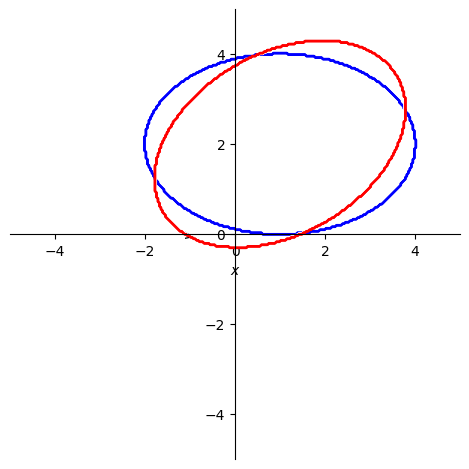

In [38]:
from sympy.abc import x, y, u, v
eq = ellipse.equation(x = 'x', y = 'y')

display(Latex(fr"""\textbf{{Уравнение эллипса: }}{latex(Eq(eq, 0))}"""))
print()

symb_free = eq.free_symbols
dct = {str(a): a for a in symb_free}
p = plot_implicit(eq,
                  (dct['x'], -5, 5),
                  (dct['y'], -5, 5),
                  aspect_ratio=(1, 1),
                  adaptive=False,
                  show = False)

slp = tan(pi / 6)

eq = ellipse.equation(x = 'u', y = 'v', _slope = slp).simplify()
display(Latex(fr"""\textbf{{Уравнение повернутого эллипса: }}{latex(Eq(eq, 0))}"""))
print()

symb_free = eq.free_symbols
dct = {str(a) : a for a in symb_free}
p.extend(plot_implicit(eq,
                  (dct['u'], -5, 5),
                  (dct['v'], -5, 5),
                  aspect_ratio=(1, 1),
                  adaptive=False,
                  show = False,
                  line_color='r'))

p.show()

### Задание 3.
Найти вершины эллипса из Задания 1.

**Указание:** вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через форкусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы.

In [43]:
eps_eq = ellipse.equation(x = 'x', y = 'y')
line1 = Line(*ellipse.foci, x = 'x', y = 'y')
line2 = line1.perpendicular_line(ellipse.center)

slv1 = solve([Eq(eps_eq, 0), Eq(line1.equation(), 0)])
slv2 = solve([Eq(eps_eq, 0), Eq(line2.equation(), 0)])

dots1 = [(list(i.values())[0], list(i.values())[1]) for i in slv1]
dots2 = [(list(i.values())[0], list(i.values())[1]) for i in slv2]

display(Latex(fr"""\textbf{{Горизонтальные вершины: }}{latex(dots1)} \\"""))
display(Latex(fr"""\textbf{{Вертикальные вершины: }}{latex(dots2)}"""))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 4.
Провести касательные к эллипсу из Задания 1 через его вершины.

Указание: использовать equation прямых Line, plot_implicit. Для корректного изображения на графике горизонтальных прямых в plot_implicit указывать диапазоны значений и переменной $x$ и переменной $y$.

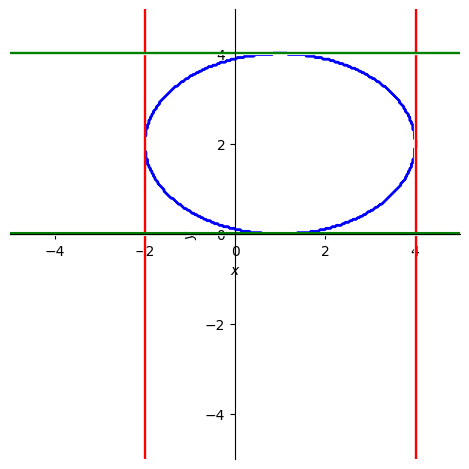

In [45]:
eq = ellipse.equation(x = 'x', y = 'y')
symb_free = eq.free_symbols
dct = {str(a): a for a in symb_free}
l, r = -5, 5

p = plot_implicit(eps_eq, (dct['x'], l, r), (dct['y'], l, r),
                  aspect_ratio = (1, 1), adaptive = False, show = False)

r1 = Line(Point(*list(slv1[0].values())), Point(*list(slv1[1].values())))
r2 = Line(Point(*list(slv2[0].values())), Point(*list(slv2[1].values())))

for d in dots1:
  p.extend(plot_implicit(r1.perpendicular_line(Point(d)).equation(),
                         (dct['x'], l, r), (dct['y'], l, r),
                          aspect_ratio = (1, 1), adaptive = False, show = False,
                          line_color='r'))

for d in dots2:
  p.extend(plot_implicit(r2.perpendicular_line(Point(d)).equation(),
                         (dct['x'], l, r), (dct['y'], l, r),
                         aspect_ration = (1, 1), adaptive = False, show = False,
                         line_color = 'g'))

p.show()

### Задание 5**.
Построить дочерний класс эллипсов Ellipse_rot, в этом классе должна быть переменная угол поворота, по умолчанию 0 и матрица поворота rot_matr__, по умолчанию None. По умолчанию центр эллипса в начале координат, но при построении экземпляра пользователь может задать другой центр. При построении экземпляра класса пользователь должен иметь возможность задать угол поворота. Матрица поворота - внутренняя переменная, она должна изменяться только при вызове метода change_angle, изменяющего угол поворота.

**Атрибуты класса:**

**focus_distance** фокусное расстояние $c = \sqrt{a^2 - b^2}$

**foci фокусы** в виде кортежа из точек Point

**angle** угол наклона в радианах

**slope** тангенс угла наклона (None для угла, кратного $\pi / 2$, угол от $- 2 \pi$ до $2 \pi$)

**rot_matr** (не путать с rot_matr__!!!) - матрица поворота $\left(\begin{matrix}\cos\alpha&-\sin\alpha\\ \sin\alpha&\cos\alpha\end{matrix}\right).$


**Методы:**

**change_angle** аргумент - новое значение угла поворота, метод изменяет переменную angle и матрицу поворота

**equation** возвращает уравнение эллипса, соответствующее углу поворота эллипса, у этого метода необязательные аргументы - имена переменных, по умолчанию $x$ и $y$.


Протестировать полученный класс так: создать эллипс с осями 12 и 9, центр в точке $(-1, 2)$, угол поворота $\pi / 3$, вывести на экран его эксцентриситет, фокусное расстояние, фокусы, тангенс угла наклона, матрицу поворота и уравнение. Затем заменить угол поворота на $\pi / 4$ и вывести на экран те же атрибуты и результаты работы методов, только уравнение вывести с переменными $u$ и $v$.

In [56]:
from sympy.abc import x, y

def check_angle_correctness(angle, in_radians):
    if not (type(angle) in [int, float] or angle.free_symbols != None):
      raise TypeError('Угол должен быть представлен в виде числа или \
числового выражения sympy.')

    if not in_radians:
      return (angle / S(180)) * sp.pi

    return angle

def r(c):
  pass

class Ellipse_rot(Ellipse):
  def __new__(cls, center = Point(0, 0),
              hradius = 1, vradius = 1,
              angle = 0, in_radians = True, **kwargs):
    ell = Ellipse.__new__(cls, center, hradius, vradius, **kwargs)
    ell._angle = check_angle_correctness(angle, in_radians)
    ell._rotation_matrix = Matrix([[Cos(angle), -Sin(angle)],
     [Sin(angle), Cos(angle)]])

    return ell

  @property
  def angle(self):
    return self._angle

  @property
  def slope(self):
    if tan(self._angle) == sympy.zoo:
      return None

    return tan(self._angle)

  @property
  def rot_matr(self):
    return self._rotation_matrix

  def change_angle(self, angle, in_radians = True):
    self._angle = check_angle_correctness(angle, in_radians)
    self._rotation_matrix = Matrix([[Cos(self._angle), -Sin(self._angle)],
                                  [Sin(self._angle), Cos(self._angle)]])

def get_props(ell, sx, sy):
  props = {
    'эксцентрисситет' : ell.eccentricity,
    'фокусное\ расстояние' : ell.focus_distance,
    'точки\ фокуса' : ell.foci,
    'угол\ наклона' : ell.angle,
    'тангенс\ угла\ наклона' : ell.slope,
    'матрица\ поворота' : ell.rot_matr,
    'уравнение\ эллипса' : ell.equation(sx, sy, _slope = ell.slope),
  }
  return props


ell = Ellipse_rot(Point(-1, 2), 12, 9, pi / 3)

display(Latex(fr"""\textbf{{Для эллипса: }} {latex(ell)}: """))
print()

props = get_props(ell, x, y)
display(*[Latex(f'{key} = {latex(props[key])}') for key in props])

print()
display(Latex(fr"""\textbf{{Заменим угол поворота на }}{latex(pi / 4)}"""))
print()

ell.change_angle(pi / 4)
props = get_props(ell, u, v)
display(*[Latex(f'{key} = {latex(props[key])}') for key in props])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

###  Индивидуальное задание
Эллипс с центром $A$, вертикальной полуосью $b$ и эксцентриситетом $\varepsilon$.
Изобразить на графике эллипс, а также эллипс, повернутый на угол $\alpha$ градусов против часовой стрелки.

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.

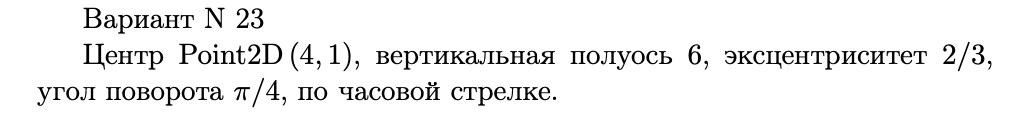

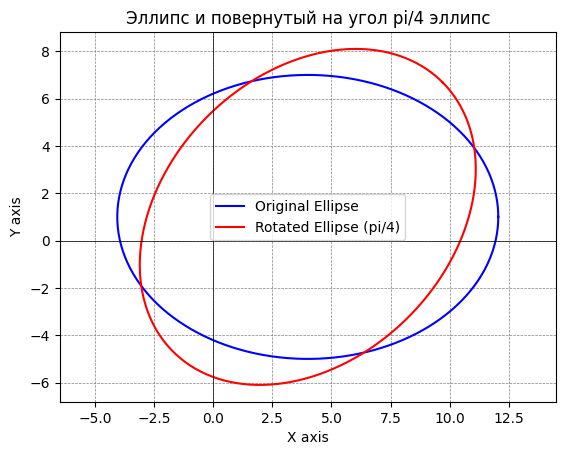

Уравнение эллипса: 0.246913580246914*(0.25*x - 1)**2 + (y/6 - 1/6)**2 - 1
Центр эллипса: Point2D(4, 1)
Фокусы эллипса: (Point2D(-2733126291999/2000000000000, 1), Point2D(18733126291999/2000000000000, 1))
Длина полуоси a: 8.04984471899924
Длина полуоси b: 6
Горизонтальные вершины: [(-4.04984471899924, 1.00000000000000), (12.0498447189992, 1.00000000000000)]
Вертикальные вершины: [(4.00000000000000, -5.00000000000000), (4.00000000000000, 7.00000000000000)]


In [47]:
a = float(6 / (1 - (2/3)**2)**(1/2))
b = 6
c = (a**2 - b**2)**(1/2)
center_x = 4
center_y = 1

ellipse = Ellipse(Point(center_x, center_y), vradius =6, eccentricity = 2/3)

def ellipse_points(a, b, center_x, center_y, theta=0):
    t = np.linspace(0, 2*np.pi, 300)
    x = center_x + a * np.cos(t) * np.cos(theta) + b * np.sin(t) * np.sin(theta)
    y = center_y + a * np.cos(t) * np.sin(theta) - b * np.sin(t) * np.cos(theta)
    return x, y

x_ellipse, y_ellipse = ellipse_points(a, b, center_x, center_y)
x_ellipse_rot, y_ellipse_rot = ellipse_points(a, b, center_x, center_y, theta=np.pi/4)

plt.plot(x_ellipse, y_ellipse, color='blue', label='Original Ellipse')
plt.plot(x_ellipse_rot, y_ellipse_rot, color='red', label='Rotated Ellipse (pi/4)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title("Эллипс и повернутый на угол pi/4 эллипс")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.axis('equal')
plt.show()

# Получаем информацию об эллипсе
center = ellipse.center
foci = ellipse.foci
semi_major_axis = ellipse.hradius
semi_minor_axis = ellipse.vradius

# Вычисляем вершины эллипса
ellipse_eq = ((x - center.x)**2) / a**2 + ((y - center.y)**2) / b**2 - 1

f1 = center.x - c, center.y
f2 = center.x + c, center.y
line_foci_eq = y - center.y
vertices_main = solve((ellipse_eq, line_foci_eq), (x, y))
line_center_eq = x - center.x
vertices_minor = solve((ellipse_eq, line_center_eq), (x, y))

# Вывод информации
print(f"Уравнение эллипса: {ellipse.equation(x, y)}")
print(f"Центр эллипса: {center}")
print(f"Фокусы эллипса: {foci}")
print(f"Длина полуоси a: {semi_major_axis}")
print(f"Длина полуоси b: {semi_minor_axis}")
print("Горизонтальные вершины:", vertices_main)
print("Вертикальные вершины:", vertices_minor)
